In [1]:
#pacotes estatísitcos e de tratamento de dados
import pandas as pd
import numpy as np
import scipy.stats
#pacotes gráficos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_material = pd.read_csv('../Base de dados/csv/metal_dataset.csv', sep = ',', header=0, na_values=True, index_col= False)

In [3]:
df_material.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Std             1552 non-null   object 
 1   ID              1552 non-null   object 
 2   Material        1552 non-null   object 
 3   Heat treatment  802 non-null    object 
 4   Su              1552 non-null   int64  
 5   Sy              1552 non-null   object 
 6   A5              1339 non-null   float64
 7   Bhn             463 non-null    float64
 8   E               1552 non-null   int64  
 9   G               1552 non-null   int64  
 10  mu              1552 non-null   float64
 11  Ro              1552 non-null   int64  
 12  pH              193 non-null    float64
 13  Desc            981 non-null    object 
 14  HV              165 non-null    float64
dtypes: float64(5), int64(4), object(6)
memory usage: 182.0+ KB


In [4]:
df_material.describe(include='all')

,Std,ID,Material,Heat treatment,Su,Sy,A5,Bhn,E,G,mu,Ro,pH,Desc,HV
count,1552,1552,1552,802,1552.000000,1552,1339.000000,463.000000,1552.000000,1552.000000,1552.000000,1552.000000,193.000000,981,165.000000
unique,8,1552,1225,44,NaN,291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83,NaN
top,ANSI,D8894772B88F495093C43AF905AB6373,Nodular cast iron,Wrought,NaN,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Heat-treatment steel,NaN
freq,622,1,20,203,NaN,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105,NaN
mean,NaN,NaN,NaN,NaN,572.753222,NaN,19.425243,177.138229,164571.520619,85598.840206,0.302977,6929.843428,627.393782,NaN,328.484848
std,NaN,NaN,NaN,NaN,326.834927,NaN,12.383319,113.508044,56135.405867,125326.800138,0.024590,2115.171710,370.530293,NaN,202.764089
min,NaN,NaN,NaN,NaN,69.000000,NaN,0.500000,19.000000,73000.000000,26000.000000,0.200000,1750.000000,190.000000,NaN,105.000000
25%,NaN,NaN,NaN,NaN,340.000000,NaN,11.000000,78.000000,105000.000000,40000.000000,0.300000,7160.000000,370.000000,NaN,192.000000
50%,NaN,NaN,NaN,NaN,500.000000,NaN,16.000000,170.000000,206000.000000,79000.000000,0.300000,7860.000000,460.000000,NaN,230.000000
75%,NaN,NaN,NaN,NaN,705.000000,NaN,24.750000,229.000000,206000.000000,80000.000000,0.320000,7860.000000,796.000000,NaN,492.000000


In [5]:
print(df_material['Heat treatment'].unique())

['as-rolled' 'normalized' 'annealed' 'tempered at 400 F'
 'tempered at 600 F' 'tempered at 800 F' '1/4-hard' '1/2-hard' '3/4-hard'
 'Full-hard' nan 'As hot rolled' 'As extruded' 'Cast (T7)' 'Cast (T4)'
 'Cast (F)' 'Cast (T61)' 'Cast (T77)' 'Cast (T6)' 'Cast (T62)'
 'Cast (T51)' 'Cast (T71)' 'Cast (F or T5)' 'Cast (T5)' 'Cast (T52)'
 'Cast (T53)' 'Wrought' 'sand casting' 'pressure die casting'
 'heat treated' 'case-hardened' 'face hardened' 'nitro-carburized'
 'nitro-case-hard.' 'nitrided' 'Heat-treatment nitrided steel'
 'Cold working' 'Annealing or high tempering' 'Improved'
 'Quenched and tempered' 'Quenching and cooling in the water'
 'Quenching and cooling in the oil' 'Quenching and heating'
 'Case hardening,quenching and cooling in the oil' 'Annealing']


In [6]:
print(df_material['Heat treatment'].value_counts())

Heat treatment
Wrought                                            203
normalized                                         152
Quenched and tempered                               71
annealed                                            66
heat treated                                        54
tempered at 400 F                                   29
Quenching and cooling in the oil                    25
case-hardened                                       22
sand casting                                        18
as-rolled                                           14
Quenching and cooling in the water                  13
Improved                                            12
As extruded                                         11
face hardened                                       10
Annealing or high tempering                          9
Cold working                                         9
Cast (T6)                                            8
Cast (F)                                          

In [7]:
print(df_material.isnull().sum())

Std                  0
ID                   0
Material             0
Heat treatment     750
Su                   0
Sy                   0
A5                 213
Bhn               1089
E                    0
G                    0
mu                   0
Ro                   0
pH                1359
Desc               571
HV                1387
dtype: int64


Text(0.5, 0, 'Tratamento térmico')

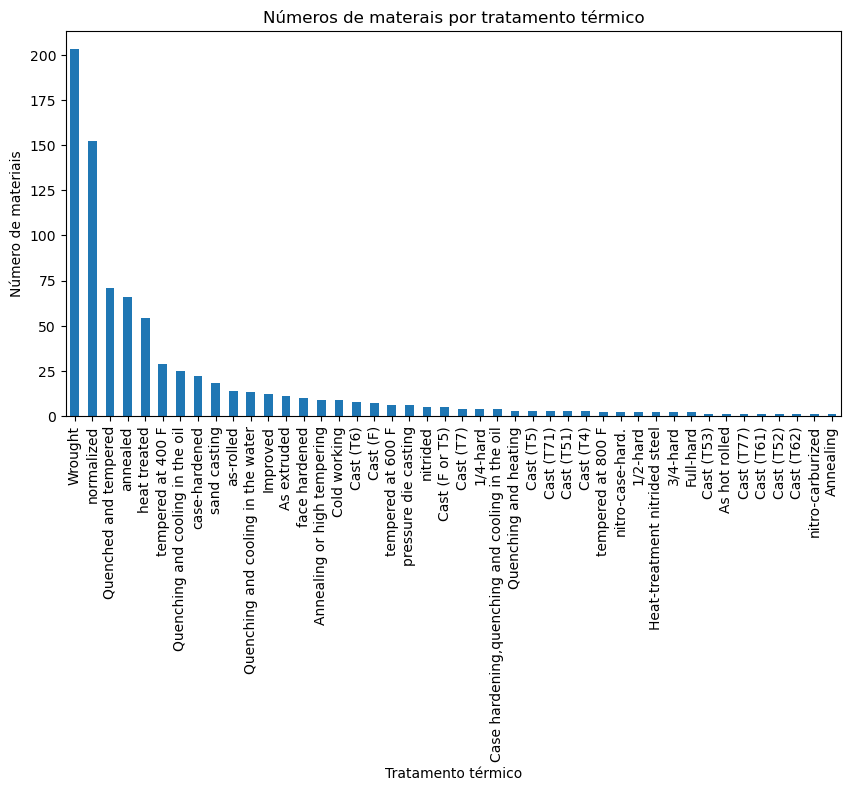

In [8]:
df_material['Heat treatment'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Números de materais por tratamento térmico')
plt.ylabel('Número de materiais')
plt.xlabel('Tratamento térmico')

In [9]:
df_material['Heat treatment'].fillna('Desconhecido', inplace = True)
df_material.head(5)

,Std,ID,Material,Heat treatment,Su,Sy,A5,Bhn,E,G,mu,Ro,pH,Desc,HV
0,ANSI,D8894772B88F495093C43AF905AB6373,Steel SAE 1015,as-rolled,421,314,39.0,126.0,207000,79000,0.3,7860,NaN,NaN,NaN
1,ANSI,05982AC66F064F9EBC709E7A4164613A,Steel SAE 1015,normalized,424,324,37.0,121.0,207000,79000,0.3,7860,NaN,NaN,NaN
2,ANSI,356D6E63FF9A49A3AB23BF66BAC85DC3,Steel SAE 1015,annealed,386,284,37.0,111.0,207000,79000,0.3,7860,NaN,NaN,NaN
3,ANSI,1C758F8714AC4E0D9BD8D8AE1625AECD,Steel SAE 1020,as-rolled,448,331,36.0,143.0,207000,79000,0.3,7860,NaN,NaN,NaN
4,ANSI,DCE10036FC1946FC8C9108D598D116AD,Steel SAE 1020,normalized,441,346,35.8,131.0,207000,79000,0.3,7860,550.0,NaN,NaN


In [10]:
print(len(df_material))
print(df_material['Heat treatment'].unique())

1552
['as-rolled' 'normalized' 'annealed' 'tempered at 400 F'
 'tempered at 600 F' 'tempered at 800 F' '1/4-hard' '1/2-hard' '3/4-hard'
 'Full-hard' 'Desconhecido' 'As hot rolled' 'As extruded' 'Cast (T7)'
 'Cast (T4)' 'Cast (F)' 'Cast (T61)' 'Cast (T77)' 'Cast (T6)' 'Cast (T62)'
 'Cast (T51)' 'Cast (T71)' 'Cast (F or T5)' 'Cast (T5)' 'Cast (T52)'
 'Cast (T53)' 'Wrought' 'sand casting' 'pressure die casting'
 'heat treated' 'case-hardened' 'face hardened' 'nitro-carburized'
 'nitro-case-hard.' 'nitrided' 'Heat-treatment nitrided steel'
 'Cold working' 'Annealing or high tempering' 'Improved'
 'Quenched and tempered' 'Quenching and cooling in the water'
 'Quenching and cooling in the oil' 'Quenching and heating'
 'Case hardening,quenching and cooling in the oil' 'Annealing']


In [11]:
df_material_tratado = df_material
df_material_tratado = df_material.drop_duplicates(keep='first')
df_material_tratado['Material'] = df_material_tratado[['Std', 'Material']].fillna('').agg(' '.join, axis = 1)
df_material_tratado.drop(['Std', 'pH','Desc','HV','ID'], axis = 1, inplace = True)
df_material_tratado.fillna(0, inplace=True)
df_material_tratado.head(5)

,Material,Heat treatment,Su,Sy,A5,Bhn,E,G,mu,Ro
0,ANSI Steel SAE 1015,as-rolled,421,314,39.0,126.0,207000,79000,0.3,7860
1,ANSI Steel SAE 1015,normalized,424,324,37.0,121.0,207000,79000,0.3,7860
2,ANSI Steel SAE 1015,annealed,386,284,37.0,111.0,207000,79000,0.3,7860
3,ANSI Steel SAE 1020,as-rolled,448,331,36.0,143.0,207000,79000,0.3,7860
4,ANSI Steel SAE 1020,normalized,441,346,35.8,131.0,207000,79000,0.3,7860


In [12]:
print(len(df_material_tratado))
print(df_material_tratado['Heat treatment'].unique())

1552
['as-rolled' 'normalized' 'annealed' 'tempered at 400 F'
 'tempered at 600 F' 'tempered at 800 F' '1/4-hard' '1/2-hard' '3/4-hard'
 'Full-hard' 'Desconhecido' 'As hot rolled' 'As extruded' 'Cast (T7)'
 'Cast (T4)' 'Cast (F)' 'Cast (T61)' 'Cast (T77)' 'Cast (T6)' 'Cast (T62)'
 'Cast (T51)' 'Cast (T71)' 'Cast (F or T5)' 'Cast (T5)' 'Cast (T52)'
 'Cast (T53)' 'Wrought' 'sand casting' 'pressure die casting'
 'heat treated' 'case-hardened' 'face hardened' 'nitro-carburized'
 'nitro-case-hard.' 'nitrided' 'Heat-treatment nitrided steel'
 'Cold working' 'Annealing or high tempering' 'Improved'
 'Quenched and tempered' 'Quenching and cooling in the water'
 'Quenching and cooling in the oil' 'Quenching and heating'
 'Case hardening,quenching and cooling in the oil' 'Annealing']


In [13]:
display(
    df_material_tratado['Sy'].unique(),
    df_material_tratado['Su'].unique(),
    df_material_tratado['A5'].unique(),
    df_material_tratado['Bhn'].unique(),
    df_material_tratado['E'].unique(),
    df_material_tratado['G'].unique(),
    df_material_tratado['mu'].unique(),
    df_material_tratado['Ro'].unique())

array(['314', '324', '284', '331', '346', '295', '359', '317', '345',
       '341', '648', '414', '374', '353', '593', '427', '365', '724',
       '483', '421', '372', '779', '586', '524', '376', '979', '572',
       '500', '379', '827', '305', '303', '279', '316', '319', '396',
       '938', '405', '1213', '400', '627', '558', '436', '1593', '600',
       '422', '758', '1662', '360', '1462', '655', '417', '1641', '734',
       '1724', '464', '425', '862', '472', '1675', '366', '484', '1407',
       '1517', '293', '529', '357', '1731', '531', '276', '1793', '615',
       '412', '1689', '385', '429', '1503', '1669', '688', '386', '1551',
       '607', '415', '1655', '579', '486', '2048', '571', '440', '517',
       '931', '965', '255', '241', '207', '1000', '1034', '1344', '310',
       '1069', '448', '1896', '138', '172', '538', '455', '552', '62',
       '248', '469', '69', '117', '110', '97', '90', '83', '159', '124',
       '193', '290', '262', '165', '221', '145', '152', '179', '18

array([ 421,  424,  386,  448,  441,  395,  503,  483,  450,  552,  517,
        464,  848,  621,  590,  519,  779,  724,  748,  636,  979,  814,
        776,  626, 1103,  965, 1010,  615, 1303, 1014,  657, 1289,  487,
        467,  429,  521,  477,  627,  669,  584, 1082,  676,  707,  598,
       1634,  703,  667,  876,  836, 1806,  891,  689, 1027, 1800,  560,
       1627, 1020,  655, 1772, 1155,  729, 1931,  793,  579, 1279,  745,
       1875,  574,  512,  755,  681, 1744, 1613,  572, 1793,  870, 1944,
        957,  722, 2220,  939,  633,  536,  650,  564, 1641, 1862, 1024,
        715, 1937,  929,  695, 1999,  933,  774, 2103, 1758,  907,  820,
        862, 1034, 1207, 1276,  758,  586,  538,  600,  634, 1310,  827,
       1379, 1586, 1413, 1965,  138,  172,  207,  241,  276,  345,  414,
        365,  352,  221,  255,  234,  262,  379,  490,  565,  462,  455,
        310,  303,  290,  324,  186,  469,  200,  359,  248,  269,  317,
        372,  338,  283,  296,  331,  393,  524,  3

array([39. , 37. , 36. , 35.8, 36.5, 35. , 34. , 32. , 31. , 17. , 25. ,
       28. , 30. , 19. , 20. , 23.7, 14. , 18. , 22.5, 13. , 12. , 11. ,
       24.7,  9. ,  9.5, 10. , 33. , 33.5, 32.8, 34.5, 26.8,  5. , 22. ,
       22.7, 25.5,  6. , 21. , 24.8, 19.7, 24.5, 28.2, 17.7, 25.7,  8. ,
       11.7, 20.2, 20.8, 29. , 12.2, 31.3, 24. , 22.3, 28.6, 20.7, 17.5,
       17.2,  4. , 21.8, 23. , 26.3, 23.5, 16. , 22.2, 21.7,  0. , 18.8,
       17.3, 55. , 60. , 15. , 50. , 45. ,  2. , 40. , 27. , 26. ,  0.5,
        7. , 54. , 57. , 53. , 48. , 66. , 65. , 52. , 49. , 43. , 44. ,
       46. , 64. , 70. , 42. , 63. ,  3. ,  1.5,  2.5,  3.5, 38. ])

array([126., 121., 111., 143., 131., 149., 137., 179., 495., 201., 170.,
       262., 229., 217., 187., 321., 241., 293., 174., 388., 192., 401.,
       197., 352., 163., 461., 212., 167., 277., 248., 207., 505., 310.,
       516., 156., 467., 302., 510., 530., 235., 363., 520., 482., 475.,
       490., 255., 525., 269., 627., 538., 183., 465., 460., 578., 601.,
       470.,   0., 165., 155., 160., 150., 140., 145., 390., 415., 195.,
       500., 260., 215., 230., 580., 110.,  40.,  90.,  60.,  45.,  80.,
        55.,  65.,  50.,  70.,  75.,  25.,  35.,  85., 105.,  19.,  23.,
        26.,  30.,  28.,  32.,  38.,  44.,  95., 100., 135., 120.,  47.,
       130.,  52.,  63.,  77.,  36.,  41.,  46.,  51.,  53.,  58.,  68.,
        73.,  67.,  78.,  62.,  81.,  48.,  42.,  82.,  43.,  71.,  74.,
       220., 223., 249., 331., 295., 270., 190., 210., 245., 275., 171.,
       182., 199., 234., 265., 299., 315., 136., 178., 200., 216., 240.,
       263.])

array([207000, 193000, 200000,  80000,  98000, 100000, 110000, 117000,
       124000, 137000, 172000, 159000, 108000, 120000, 105000,  73000,
       206000,  85000, 169000, 160000,  91000, 115000, 201000, 203000,
       212000, 198000, 216000, 210000, 204000, 215000, 208000, 214000,
       211000, 213000, 195000, 205000, 219000,  90000,  95000, 125000,
       170000, 180000, 185000])

array([ 79000, 743000, 769000,  32000,  39000,  40000,  44000,  47000,
        50000,  55000,  68000,  66000,  37000,  45000,  26000,  80000,
        34000,  70000,  64000,  36400,  42000,  46000,  78000,  82000,
        77000,  83000,  81000,  84000,  75000,  85000,  36000,  38000,
        48000])

array([0.3 , 0.25, 0.27, 0.2 , 0.35, 0.34, 0.31, 0.32, 0.33, 0.29, 0.21])

array([7860, 8030, 7160, 8930, 8500, 8800, 2700, 1750, 7856, 7871, 7850,
       7859, 7820, 7826, 7810, 7830, 7790, 7800, 7640, 7760, 7880, 7840,
       7630, 7750, 8120, 7900, 7670, 6800, 7000, 7050, 7100, 7150, 7200,
       7300, 7400])

In [14]:
df_material_tratado['Sy'] = df_material_tratado['Sy'].str.replace(' max', '').astype(int)

In [15]:
df_material_tratado['Sy'].unique()

array([ 314,  324,  284,  331,  346,  295,  359,  317,  345,  341,  648,
        414,  374,  353,  593,  427,  365,  724,  483,  421,  372,  779,
        586,  524,  376,  979,  572,  500,  379,  827,  305,  303,  279,
        316,  319,  396,  938,  405, 1213,  400,  627,  558,  436, 1593,
        600,  422,  758, 1662,  360, 1462,  655,  417, 1641,  734, 1724,
        464,  425,  862,  472, 1675,  366,  484, 1407, 1517,  293,  529,
        357, 1731,  531,  276, 1793,  615,  412, 1689,  385,  429, 1503,
       1669,  688,  386, 1551,  607,  415, 1655,  579,  486, 2048,  571,
        440,  517,  931,  965,  255,  241,  207, 1000, 1034, 1344,  310,
       1069,  448, 1896,  138,  172,  538,  455,  552,   62,  248,  469,
         69,  117,  110,   97,   90,   83,  159,  124,  193,  290,  262,
        165,  221,  145,  152,  179,  186,  234,   41,   48,   76,  103,
        131,  228,  269,  338,  200,   28,   34,  296,  393,  352,   55,
        214,  407,  283,  434,  490,  503,  462,  2

In [16]:

df_material_tratado.head(5)

,Material,Heat treatment,Su,Sy,A5,Bhn,E,G,mu,Ro
0,ANSI Steel SAE 1015,as-rolled,421,314,39.0,126.0,207000,79000,0.3,7860
1,ANSI Steel SAE 1015,normalized,424,324,37.0,121.0,207000,79000,0.3,7860
2,ANSI Steel SAE 1015,annealed,386,284,37.0,111.0,207000,79000,0.3,7860
3,ANSI Steel SAE 1020,as-rolled,448,331,36.0,143.0,207000,79000,0.3,7860
4,ANSI Steel SAE 1020,normalized,441,346,35.8,131.0,207000,79000,0.3,7860


In [17]:
len(df_material_tratado)

1552

Análise estatística dados dados

In [18]:
sel = ['Su', 'Sy', 'A5', 'Bhn', 'E', 'G', 'mu', 'Ro']
df_numeros = df_material_tratado[sel]
df_numeros.head(5)

,Su,Sy,A5,Bhn,E,G,mu,Ro
0,421,314,39.0,126.0,207000,79000,0.3,7860
1,424,324,37.0,121.0,207000,79000,0.3,7860
2,386,284,37.0,111.0,207000,79000,0.3,7860
3,448,331,36.0,143.0,207000,79000,0.3,7860
4,441,346,35.8,131.0,207000,79000,0.3,7860


In [19]:
df_corr_pearson = df_numeros.corr()

In [20]:
df_corr_pearson

,Su,Sy,A5,Bhn,E,G,mu,Ro
Su,1.000000,0.957244,-0.212676,0.402712,0.594348,0.254508,-0.239663,0.407995
Sy,0.957244,1.000000,-0.337007,0.382471,0.472434,0.179293,-0.190256,0.273860
A5,-0.212676,-0.337007,1.000000,-0.050868,0.075470,0.194725,0.255540,0.290357
Bhn,0.402712,0.382471,-0.050868,1.000000,0.183929,0.243444,-0.116982,0.052230
E,0.594348,0.472434,0.075470,0.183929,1.000000,0.279431,-0.446692,0.716853
G,0.254508,0.179293,0.194725,0.243444,0.279431,1.000000,-0.108699,0.222848
mu,-0.239663,-0.190256,0.255540,-0.116982,-0.446692,-0.108699,1.000000,-0.400175
Ro,0.407995,0.273860,0.290357,0.052230,0.716853,0.222848,-0.400175,1.000000


teste de hipóteses

In [21]:
st1, p_v1 = scipy.stats.normaltest(df_material_tratado.Su)
st2, p_v2 = scipy.stats.normaltest(df_material_tratado.Sy)
st3, p_v3 = scipy.stats.normaltest(df_material_tratado.A5)
st4, p_v4 = scipy.stats.normaltest(df_material_tratado.Bhn)
st5, p_v5 = scipy.stats.normaltest(df_material_tratado.E)
st6, p_v6 = scipy.stats.normaltest(df_material_tratado.G)
st7, p_v7 = scipy.stats.normaltest(df_material_tratado.mu)
st8, p_v8 = scipy.stats.normaltest(df_material_tratado.Ro)

print('Variável Su: ', 'Stat_test: ', st1.round(3), 'p_valor: ', p_v1.round(10))
print('Variável Sy: ', 'Stat_test: ', st2.round(3), 'p_valor: ', p_v2.round(10))
print('Variável A5: ', 'Stat_test: ', st3.round(3), 'p_valor: ', p_v3.round(10))
print('Variável Bhn: ', 'Stat_test: ', st4.round(3), 'p_valor: ', p_v4.round(10))
print('Variável E: ', 'Stat_test: ', st5.round(3), 'p_valor: ', p_v5.round(10))
print('Variável G: ', 'Stat_test: ', st6.round(3), 'p_valor: ', p_v6.round(10))
print('Variável mu: ', 'Stat_test: ', st7.round(3), 'p_valor: ', p_v7.round(10))
print('Variável Ro: ', 'Stat_test: ', st8.round(3), 'p_valor: ', p_v8.round(10))


Variável Su:  Stat_test:  426.434 p_valor:  0.0
Variável Sy:  Stat_test:  668.157 p_valor:  0.0
Variável A5:  Stat_test:  230.141 p_valor:  0.0
Variável Bhn:  Stat_test:  749.246 p_valor:  0.0
Variável E:  Stat_test:  2919.205 p_valor:  0.0
Variável G:  Stat_test:  1525.788 p_valor:  0.0
Variável mu:  Stat_test:  588.569 p_valor:  0.0
Variável Ro:  Stat_test:  344.337 p_valor:  0.0


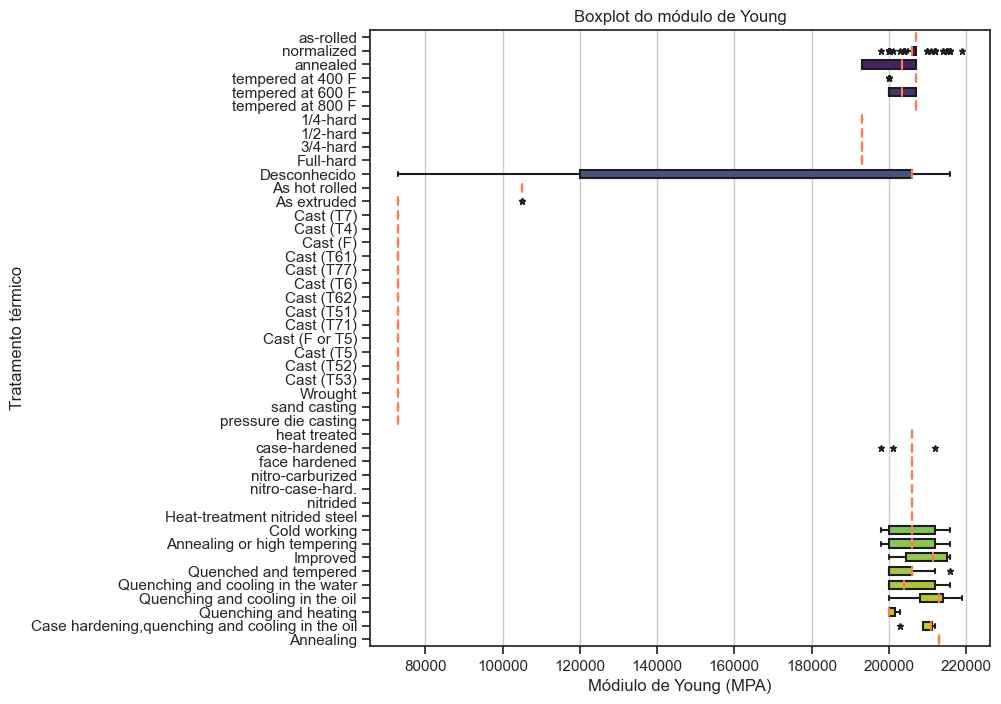

In [22]:
sns.set_theme(style = 'ticks')

f, ax = plt.subplots(figsize = (8,8))

sns.boxplot(data = df_material_tratado,
            x = 'E', y = 'Heat treatment',
             palette = 'viridis', width = 0.6,
             showcaps = True, flierprops = {"marker": "*"},
             medianprops = {"color": "coral"})

ax.xaxis.grid(True)
ax.set(xlabel = 'Módiulo de Young (MPA)')
ax.set(ylabel = 'Tratamento térmico')
ax.set(title = 'Boxplot do módulo de Young')

plt.show()

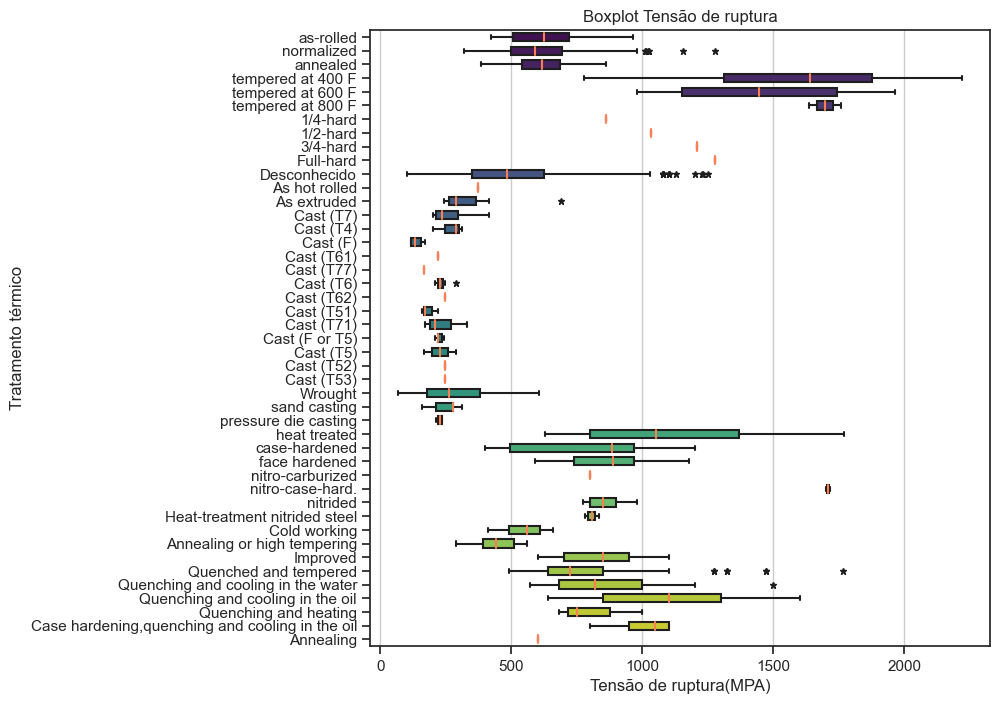

In [23]:
sns.set_theme(style = 'ticks')

f, ax = plt.subplots(figsize = (8,8))

sns.boxplot(data = df_material_tratado,
            x = 'Su', y = 'Heat treatment',
             palette = 'viridis', width = 0.6,
             showcaps = True, flierprops = {"marker": "*"},
             medianprops = {"color": "coral"})

ax.xaxis.grid(True)
ax.set(xlabel = 'Tensão de ruptura(MPA)')
ax.set(ylabel = 'Tratamento térmico')
ax.set(title = 'Boxplot Tensão de ruptura')

plt.show()

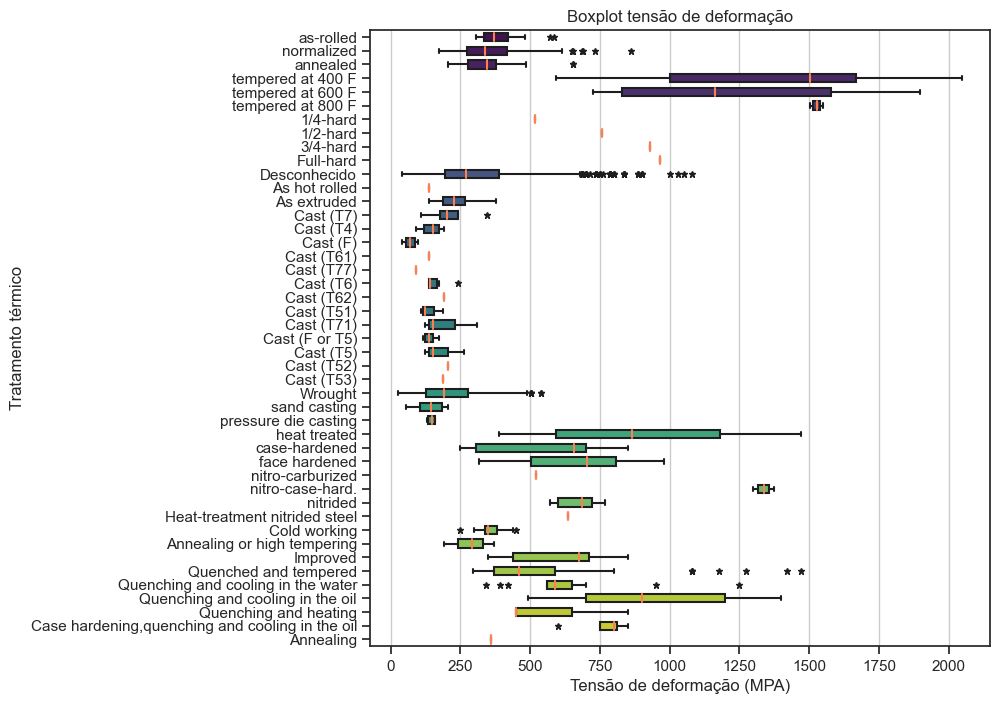

In [24]:
sns.set_theme(style = 'ticks')

f, ax = plt.subplots(figsize = (8,8))

sns.boxplot(data = df_material_tratado,
            x = 'Sy', y = 'Heat treatment',
             palette = 'viridis', width = 0.6,
             showcaps = True, flierprops = {"marker": "*"},
             medianprops = {"color": "coral"})

ax.xaxis.grid(True)
ax.set(xlabel = 'Tensão de deformação (MPA)')
ax.set(ylabel = 'Tratamento térmico')
ax.set(title = 'Boxplot tensão de deformação')

plt.show()

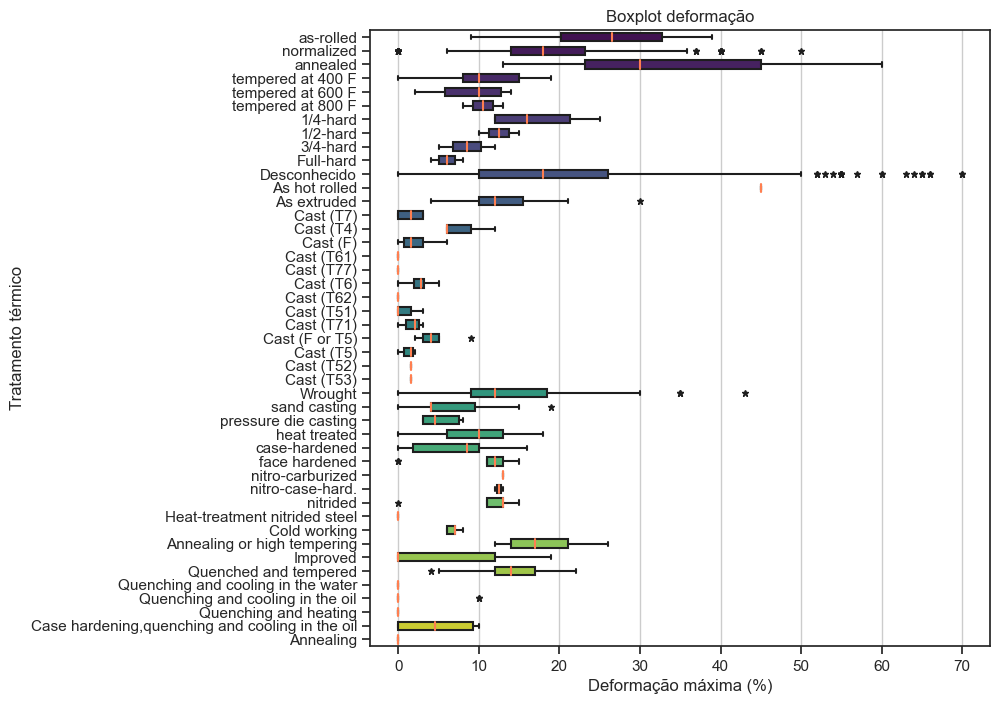

In [25]:
sns.set_theme(style = 'ticks')

f, ax = plt.subplots(figsize = (8,8))

sns.boxplot(data = df_material_tratado,
            x = 'A5', y = 'Heat treatment',
             palette = 'viridis', width = 0.6,
             showcaps = True, flierprops = {"marker": "*"},
             medianprops = {"color": "coral"})

ax.xaxis.grid(True)
ax.set(xlabel = 'Deformação máxima (%)')
ax.set(ylabel = 'Tratamento térmico')
ax.set(title = 'Boxplot deformação')

plt.show()

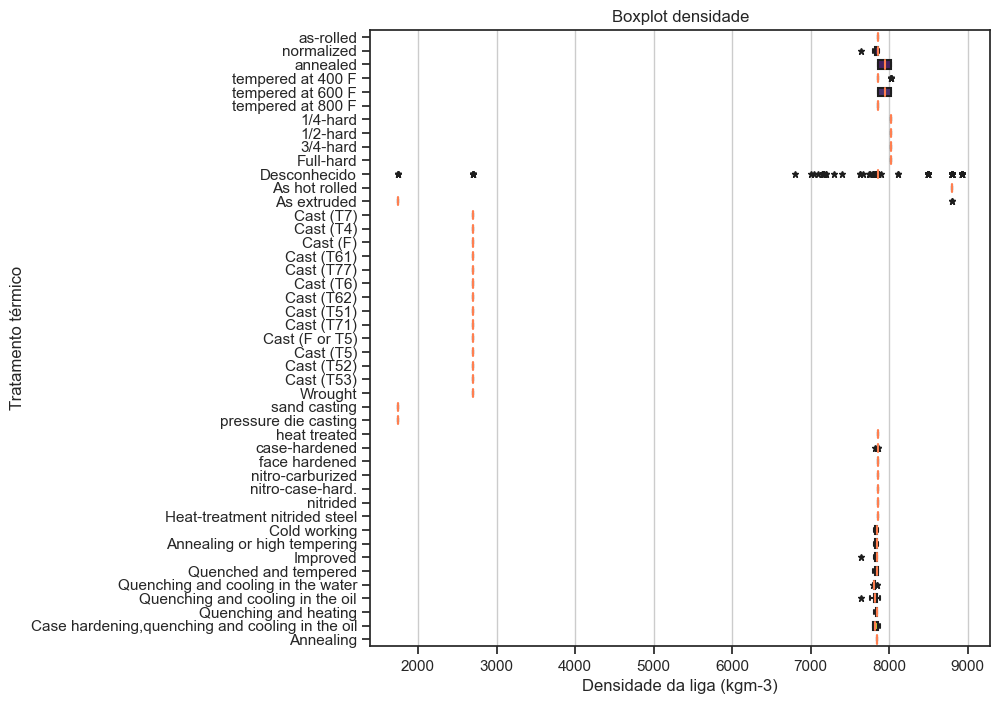

In [26]:
sns.set_theme(style = 'ticks')

f, ax = plt.subplots(figsize = (8,8))

sns.boxplot(data = df_material_tratado,
            x = 'Ro', y = 'Heat treatment',
             palette = 'viridis', width = 0.6,
             showcaps = True, flierprops = {"marker": "*"},
             medianprops = {"color": "coral"})

ax.xaxis.grid(True)
ax.set(xlabel = 'Densidade da liga (kgm-3)')
ax.set(ylabel = 'Tratamento térmico')
ax.set(title = 'Boxplot densidade')

plt.show()

/Volumes/Dados_1/Aplicativos/anaconda3/envs/tcc_dsa/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


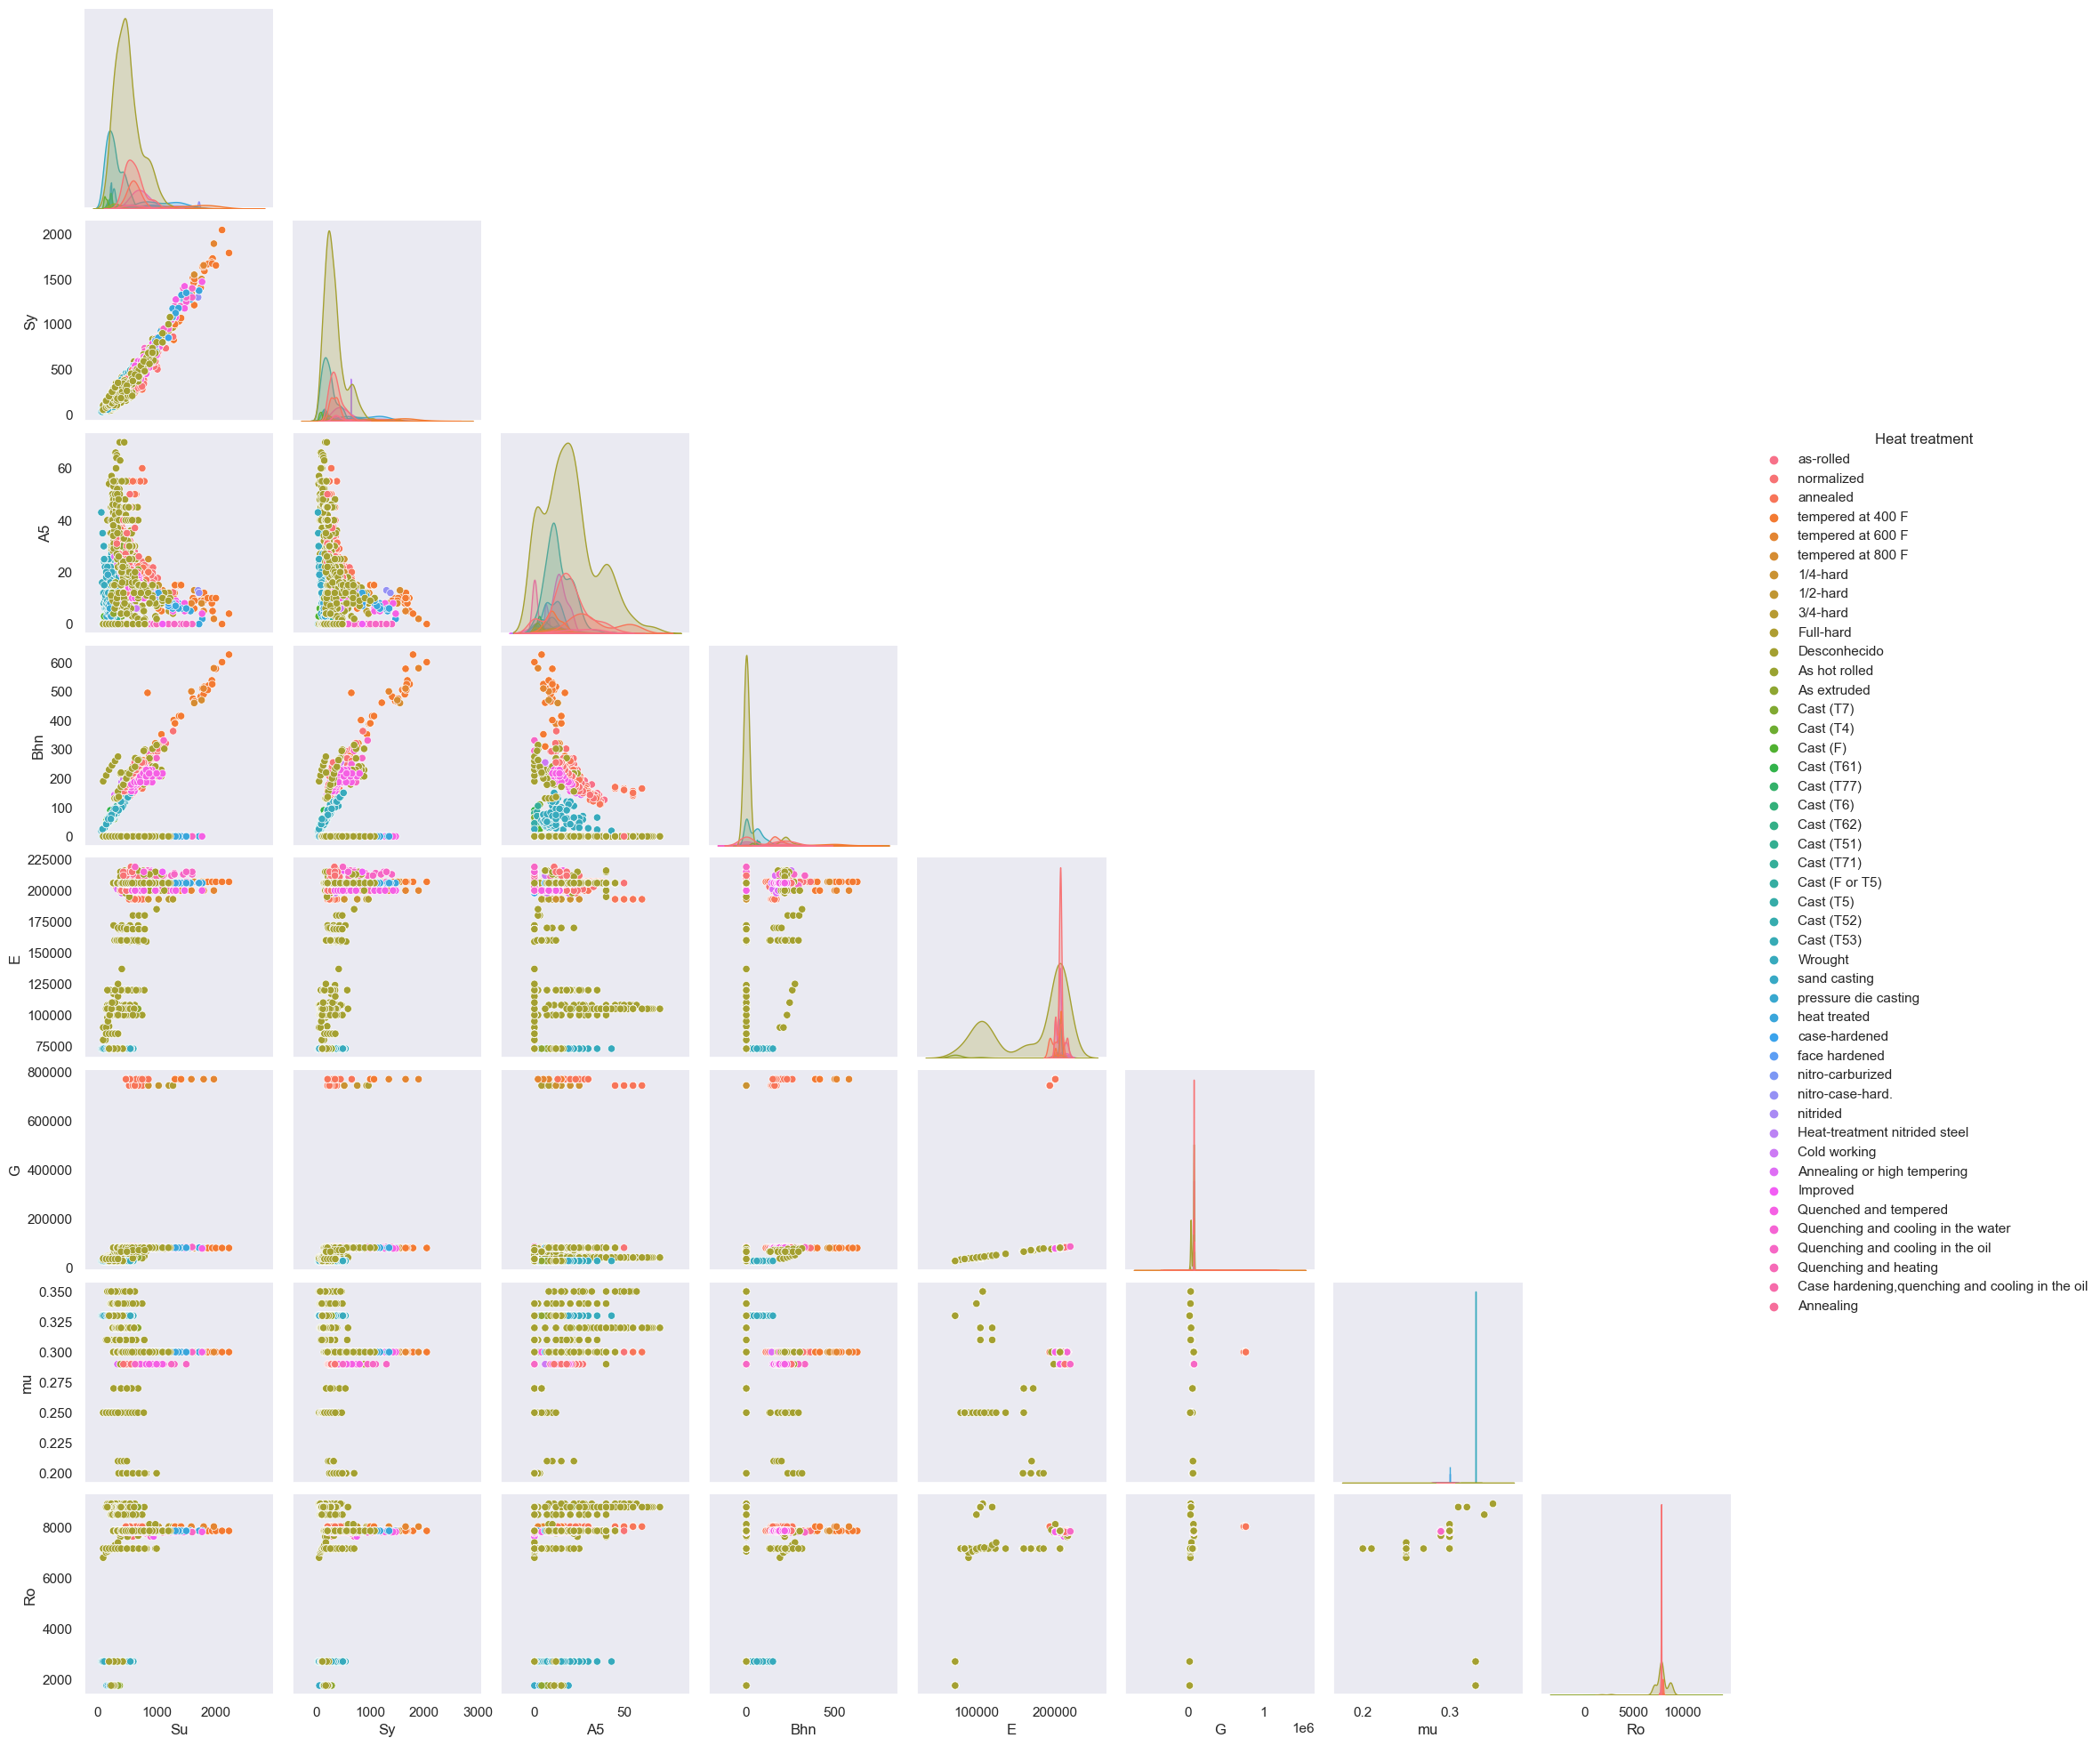

In [121]:
sns.set_theme(style = 'dark')

sns.pairplot(df_material_tratado, hue = 'Heat treatment', corner=True)

plt.show()

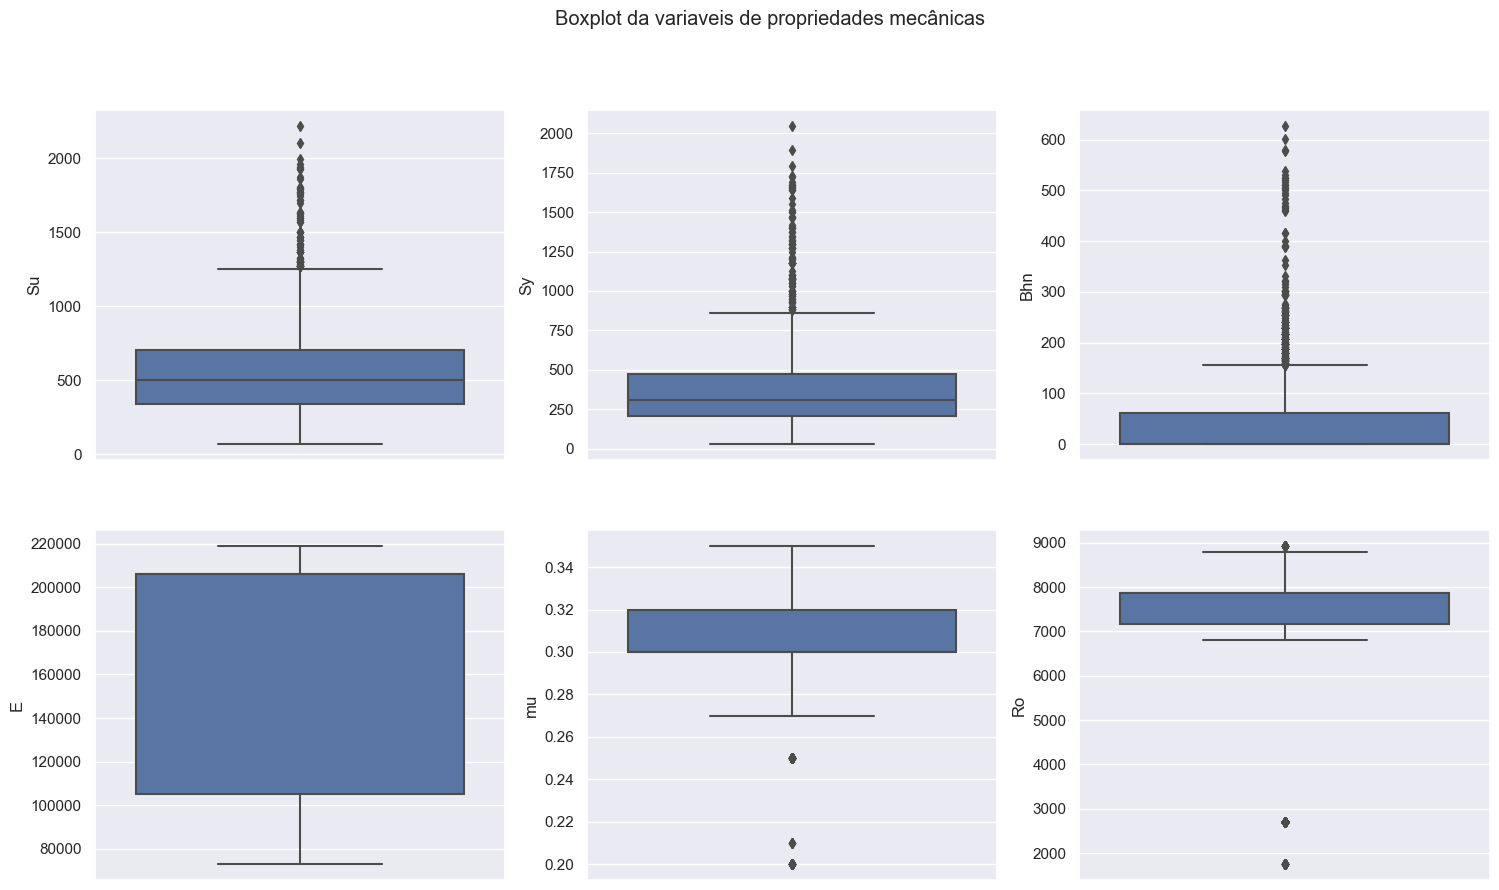

In [130]:
sns.set_theme(style='darkgrid')

f, axes = plt.subplots(2,3, figsize=(18,10))

f.suptitle('Boxplot da variaveis de propriedades mecânicas')

sns.boxplot(data = df_material_tratado, y='Su', ax=axes[0,0])
sns.boxplot(data = df_material_tratado, y='Sy', ax=axes[0,1])
sns.boxplot(data = df_material_tratado, y='Bhn', ax=axes[0,2])
sns.boxplot(data = df_material_tratado, y='E', ax=axes[1,0])
sns.boxplot(data = df_material_tratado, y='mu', ax=axes[1,1])
sns.boxplot(data = df_material_tratado, y='Ro', ax=axes[1,2])

plt.show()

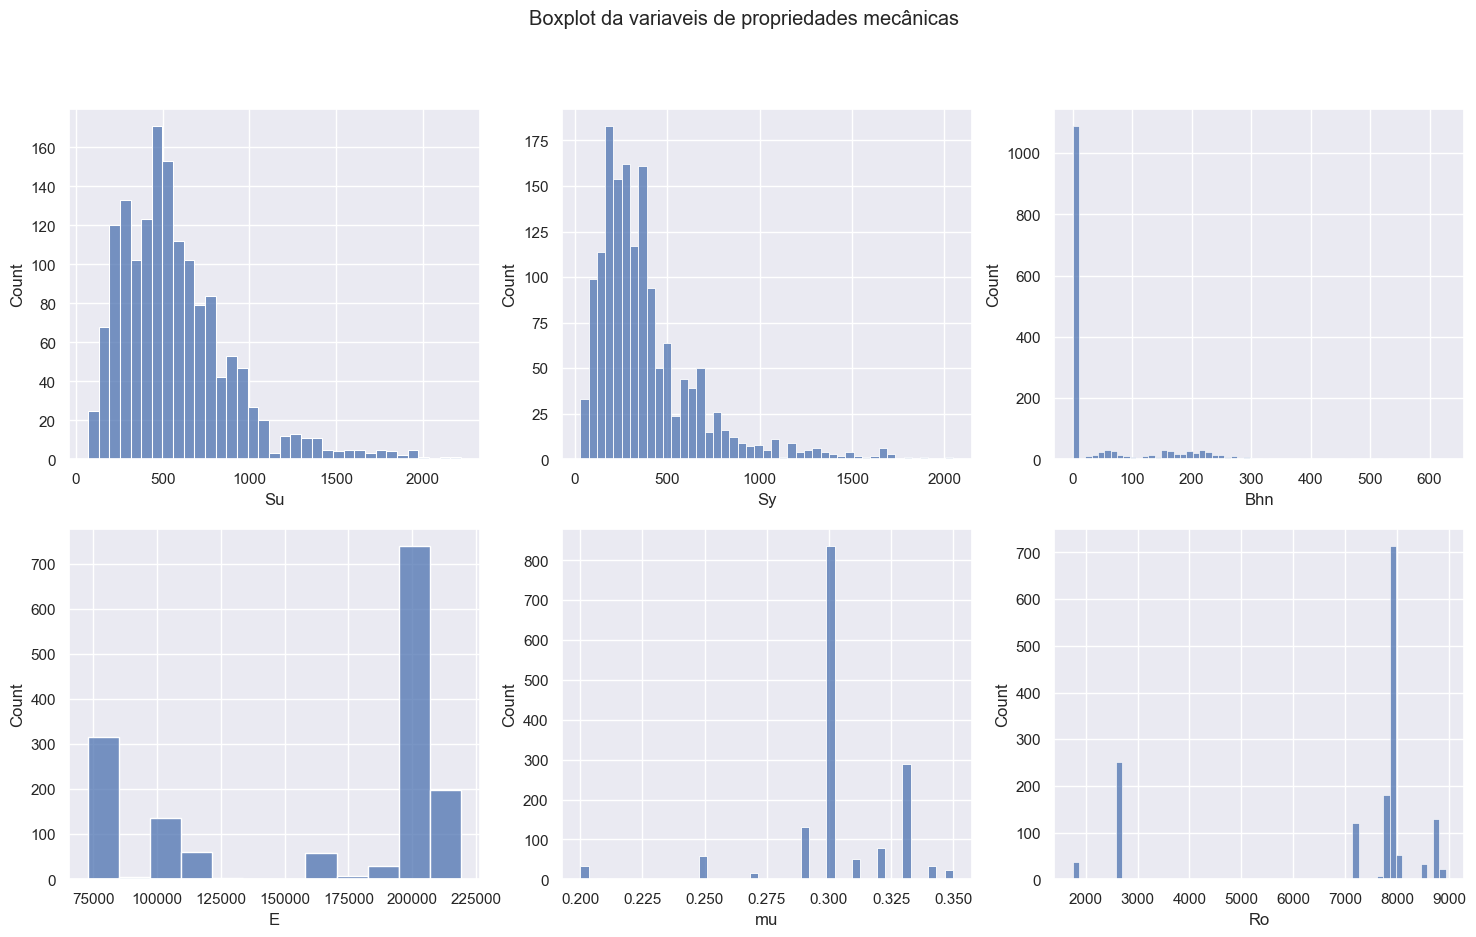

In [132]:
sns.set_theme(style='darkgrid')

f, axes = plt.subplots(2,3, figsize=(18,10))

f.suptitle('Boxplot da variaveis de propriedades mecânicas')

sns.histplot(data = df_material_tratado, x='Su', ax=axes[0,0])
sns.histplot(data = df_material_tratado, x='Sy', ax=axes[0,1])
sns.histplot(data = df_material_tratado, x='Bhn', ax=axes[0,2])
sns.histplot(data = df_material_tratado, x='E', ax=axes[1,0])
sns.histplot(data = df_material_tratado, x='mu', ax=axes[1,1])
sns.histplot(data = df_material_tratado, x='Ro', ax=axes[1,2])

plt.show()

In [27]:
#teste de normalidade shapirowilkes
nSu = scipy.stats.shapiro(df_material_tratado.Su)
nSy= scipy.stats.shapiro(df_material_tratado.Sy)
nA5 = scipy.stats.shapiro(df_material_tratado.A5)
nBhn = scipy.stats.shapiro(df_material_tratado.Bhn)
nE = scipy.stats.shapiro(df_material_tratado.E)
nG = scipy.stats.shapiro(df_material_tratado.G)
nmu = scipy.stats.shapiro(df_material_tratado.mu)
nRo = scipy.stats.shapiro(df_material_tratado.Ro)

In [28]:
display('Su: ', nSu,
        'Sy: ', nSy,
        'A5: ', nA5, 
        'Bhn: ', nBhn,
        'E: ', nE,
        'G: ', nG,
        'mu: ', nmu,
        'Ro: ', nRo)


'Su: '

ShapiroResult(statistic=0.8986478447914124, pvalue=7.7758631572430895e-31)

'Sy: '

ShapiroResult(statistic=0.8083354234695435, pvalue=1.8475825979445205e-39)

'A5: '

ShapiroResult(statistic=0.9186760783195496, pvalue=4.095739434667255e-28)

'Bhn: '

ShapiroResult(statistic=0.5915279984474182, pvalue=0.0)

'E: '

ShapiroResult(statistic=0.7074748277664185, pvalue=1.401298464324817e-45)

'G: '

ShapiroResult(statistic=0.297838032245636, pvalue=0.0)

'mu: '

ShapiroResult(statistic=0.7572098970413208, pvalue=6.067622350526458e-43)

'Ro: '

ShapiroResult(statistic=0.6227648854255676, pvalue=0.0)

Tratando os outliers

In [139]:
#IQR metodo

# para a tensão de ruptura Su
q1su = np.percentile(df_material_tratado.Su, 25)
q3su = np.percentile(df_material_tratado.Su, 75)

IQRsu = q3su - q1su

lsu = q1su-(1.5*IQRsu)
usu = q3su+(1.5*IQRsu)

#para tensão plastica
q1sy = np.percentile(df_material_tratado.Sy, 25)
q3sy = np.percentile(df_material_tratado.Sy, 75)

IQRsy = q3sy - q1sy

lsy = q1sy-(1.5*IQRsy)Í
usy = q3sy+(1.5*IQRsy)

# para dureza
q1Bhn = np.percentile(df_material_tratado.Bhn, 25)
q3Bhn = np.percentile(df_material_tratado.Bhn, 75)

IQRBhn = q3Bhn - q1Bhn

lBhn = q1Bhn-(1.5*IQRBhn)
uBhn = q3Bhn+(1.5*IQRBhn)

In [29]:
# teste do Two-away ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
modelo_anova = ols('Heat treatment ~ C(Su) + C(Sy) + C(Bhn) + C(E) + C(G) + C(mu) + C(Ro)', data = df_material_tratado).fit()

In [119]:
tabela_anova = sm.stats.anova_lm(modelo_anova, typ=3)

In [120]:
tabela_anova

,sum_sq,df,F,PR(>F)
C(Sy),6.640686e+07,285.0,77.792429,0.000000e+00
C(Bhn),1.036365e+07,143.0,24.196138,2.423426e-252
C(E),9.822146e+05,42.0,7.807758,4.354027e-39
C(G),7.796396e+05,32.0,8.134168,4.998122e-33
C(mu),5.718241e+05,10.0,19.091133,1.278509e-32
C(Ro),4.565420e+05,34.0,4.483024,1.319215e-15
Residual,3.237848e+06,1081.0,NaN,NaN


In [ ]:
df_material_tratado

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
sns.countplot(df_material_tratado['Su'])